# how_to_preprocess ([link](https://github.com/yunjey/pytorch-tutorial/blob/master/tutorials/03-advanced/image_captioning/data_loader.py))

### let's start with just training captions / data

In [1]:
dataDir = '.'
train_dataType = 'train2014' 

captions_annFile = '{}/annotations/captions_{}.json'.format(dataDir, train_dataType)
print(captions_annFile)

./annotations/captions_train2014.json


In [2]:
from pycocotools.coco import COCO

coco = COCO(captions_annFile)

loading annotations into memory...
Done (t=0.52s)
creating index...
index created!


In [3]:
ids = list(coco.anns.keys())
print(ids[-10:])

[829708, 829709, 829710, 829711, 829712, 829713, 829715, 829716, 829717, 829719]


### use code cell below to play with preprocessing of image ... to try to figure out what's most appropriate ...

### options ... involve two distinct choices:
- **CHOICE 1**: how to resize images? options:
    - resize all images to 256x256 (ignore aspect ratio)
    - resize all images to be 256 in smaller edge
    - resize all images to 224x224 (ignore aspect ratio)
    - resize all images to be 224 in smaller edge
- **CHOICE 2**: how to crop? options:
    - do random 224x224 crop (helps with generalization but could crop out crucial part of the image if not careful)
    - do center 224x224 crop

can playground below to visualize the effect of each on sample images

In [4]:
import torchvision.transforms as transforms

re_size = (224, 224)
crop_size = 224

transform = transforms.Compose([
    transforms.Resize(re_size),
    transforms.RandomCrop(crop_size),
    #transforms.RandomHorizontalFlip(), 
    #transforms.ToTensor(), 
    #transforms.Normalize((0.485, 0.456, 0.406), 
    #                     (0.229, 0.224, 0.225))
    ])

26
Snowboarder cuts his way down a ski slope.
411226
COCO_train2014_000000411226.jpg
images/train2014/COCO_train2014_000000411226.jpg


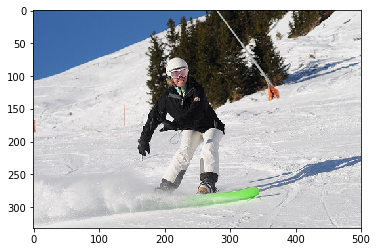

<class 'PIL.Image.Image'>


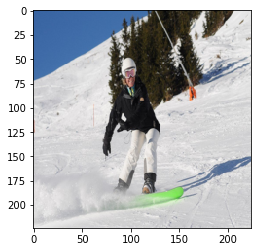

In [5]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

# will loop over index. just pick the first one for now.
root = 'images/'
index = 0
ann_id = ids[index]
print(ann_id)
caption = coco.anns[ann_id]['caption']
print(caption)
img_id = coco.anns[ann_id]['image_id']
print(img_id)
path = coco.loadImgs(img_id)[0]['file_name']
print(path)
image = Image.open(os.path.join(root, train_dataType, path)).convert('RGB')
print(os.path.join(root, train_dataType, path))
plt.imshow(np.asarray(image))
plt.show()

trans_img = transform(image)
print(type(trans_img))

plt.imshow(np.asarray(trans_img))
plt.show()